# Machine Learning

## Types of Machine Learning
### Supervised Learning
- Model is trained on labeled data
- Model learns to map inputs(features) to outputs(target)
- Examples: Classification|Regression
- Key features:
  - Requires labeled data
  - Accuracy depends heavily on the quality of the training data

### Unsupervised Learning
- Model works on unlabeled data to find hidden patterns or structures
- Examples: Clustering|Dimensionality reduction
- Key features:
  - No labeled data is needed
  - Focused on exploratory analysis and identifying patterns

### Reinforcement Learning
- An agent interacts with an environment and learns by trial and error to maximize cumulative rewards.
- Examples: Robotics|Gaming|Dynamic Systems
- Key features:
  - Goal-oriented learning based on rewards and penalties
  - Suitabble for sequential decision-making problems

## Key Concepts
- Features: The input variables used to train the model.
- Target: The output variable the model predicts.
- Training and Testing Datasets: The data split into two subsets. A typical split is 80% training and 20% testing
- Overfitting:
  - Model learns noise and details in the training data, performing poorly on new data.
  - Model becomes too complex for the dataset.
- Underfitting:
  - Model is too simple to capture the underlying patterns in the data
  - Example: Fitting a linear model to non-linear data.
- Bias-Variance Tradeoff:
  - Bias: The error introduced by assuming a simplified model.
  - Variance: Error introduced by the model' sensitivity to small changes in the training data.
  - Goal: Balance bias and variance to achieve optimal performance.

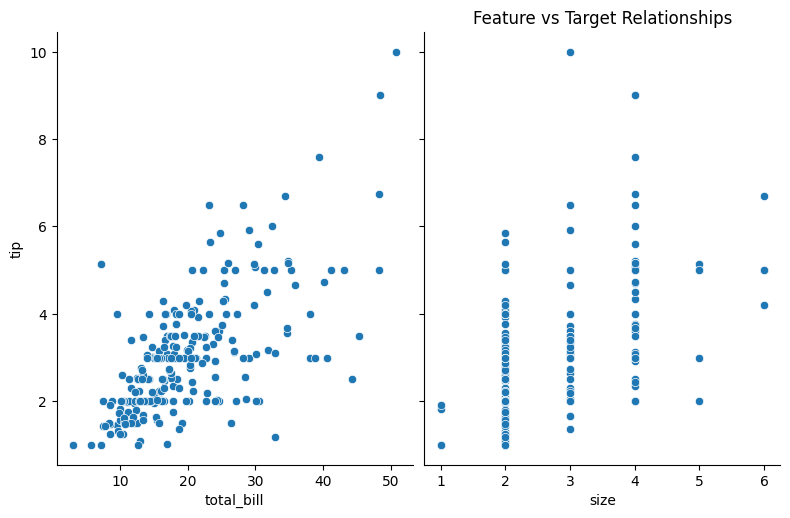

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("tips").copy()

features = df[["total_bill", "size"]]
target = df["tip"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Visualize data
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars="tip", height=5, aspect=0.8, kind="scatter")
plt.title("Feature vs Target Relationships")
plt.show()

## Supervised Learning
- Key characteristics of Supervised learning:
  - Labeled data
  - Objecitve: minimize the error between the predicted output and the actual output
  - Types: Regression: predicts continuous outputs. Classification: predicts discrete outputs.

## Introduction to Regression Analysis
### Linear regression
- Steps in Linear regression:
  - Fit the model
  - Predict
  - Evaluate
#### Cost function and Optimization in Linear Regression
- Cost function: Measures how far the predictions are from the actual values. For linear regression most common cost function is the Mean Squared Error(MSE):
<img src='img/mse.png' width="350">

<img src='img/optimization_with_gradient_descent.png' width="550">

B_1:  2.991972946299213
B_0:  0.28582663891705806


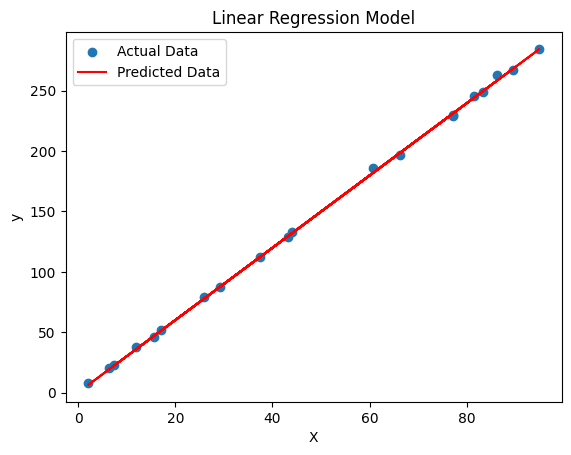

MSE:  2.6147980548680105
R2:  0.9997030960054532


In [25]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 100
y = 3 * X + np.random.randn(100, 1) * 2

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print coefficients
print("B_1: ", model.coef_[0][0])
print("B_0: ", model.intercept_[0])

plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Predicted Data")
plt.title("Linear Regression Model")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Evaluating the performence
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2: ", r2)

## Advanced Regression Models
### Polynomial Regression for Modeling Non-Linear Relationships
Polynomial regression is an extension of linear regression that models non-linear relationships by introducing higher-order terms of the input features.

<img src="img/polynomial_regression_formula.png" width=650>

#### Steps in Polynomial Regression
1. Feature Transformation
   - Create polynomial features from the original input data
   - Example: x -> [x, x^2, x^3]
2. Model Training
   - Perform linear regression on the transformed features
3. Evaluation
   - Assess the model's ability to capture the data's non-linear structure

- Advantage: Captures non-linear relationships effectively
- Limitations: Prone to overfitting with high-degree polynomials. Also, may require regularization to avoid overfitting

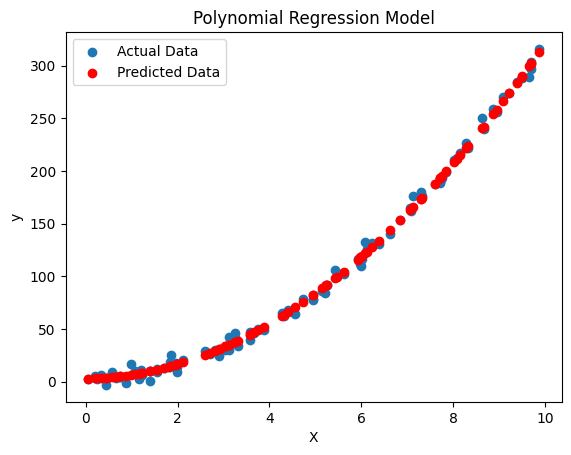

MSE:  19.429841658755922


In [31]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X**2 + 2 * X + np.random.randn(100, 1) * 5

# Transform features to polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit Polynomial Regression
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plotting results
plt.scatter(X, y, label="Actual Data")
plt.scatter(X, y_pred, color="red", label="Predicted Data")
plt.title("Polynomial Regression Model")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Evaluating the performence
mse = mean_squared_error(y, y_pred)
print("MSE: ", mse)

### Introduction to Regularization Techniques: Lasso and Ridge Regression